In [167]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import DataFrame

In [168]:
details = pd.read_pickle("Movies_Details_analysed.pkl")

In [169]:
details.head(720)

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
0,2,Drama|Crime,0.823904,1988-10-21,69.0,Ariel,7.1,40,1,1,...,0,0,0,0,0,0,0,0,1988,10
1,3,Drama|Comedy,0.47445,1986-10-16,76.0,Shadows in Paradise,7.0,32,1,0,...,0,0,0,0,0,0,0,0,1986,10
2,5,Crime|Comedy,1.698,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.32287,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1
5,9,Drama,0.001647,2004-02-09,15.0,Sunday in August,5.3,2,1,0,...,0,0,0,0,0,0,0,0,2004,2
6,11,Adventure|Action|Science Fiction,10.492614,1977-05-25,121.0,Star Wars,8.0,6168,0,0,...,0,0,0,0,0,0,0,0,1977,5
7,12,Animation|Family,9.915573,2003-05-30,100.0,Finding Nemo,7.6,5531,0,0,...,0,0,0,1,0,0,0,0,2003,5
8,13,Comedy|Drama|Romance,10.351236,1994-06-07,142.0,Forrest Gump,8.2,7204,1,0,...,1,0,0,0,0,0,0,0,1994,6
9,14,Drama,8.191009,1999-09-15,122.0,American Beauty,7.9,2994,1,0,...,0,0,0,0,0,0,0,0,1999,9


In [170]:
#details.drop(details['Movie ID'] == 882, inplace=True)
#details.head(720)
details = details[~details['Popularity'].str.contains('E')]

In [171]:
details.head()

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
0,2,Drama|Crime,0.823904,1988-10-21,69.0,Ariel,7.1,40,1,1,...,0,0,0,0,0,0,0,0,1988,10
1,3,Drama|Comedy,0.47445,1986-10-16,76.0,Shadows in Paradise,7.0,32,1,0,...,0,0,0,0,0,0,0,0,1986,10
2,5,Crime|Comedy,1.698,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.32287,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1


In [175]:
#details.groupby(['Year', 'Drama'], as_index=False)['Popularity'].aggregate(np.mean) 
details["Popularity"] = pd.to_numeric(details.Popularity)

In [176]:
x = details[(details.Year >= 2000)&(details.Year <= 2016)]

In [179]:
x.groupby(['Year', 'Drama','Thriller'], as_index=False)['Popularity'].aggregate(np.mean) 

,Year,Drama,Thriller,Popularity
0,2000,0,0,0.287051
1,2000,0,1,0.619471
2,2000,1,0,0.317480
3,2000,1,1,0.663800
4,2001,0,0,0.360435
5,2001,0,1,0.569096
6,2001,1,0,0.316414
7,2001,1,1,0.577633
8,2002,0,0,0.322148
9,2002,0,1,0.594165


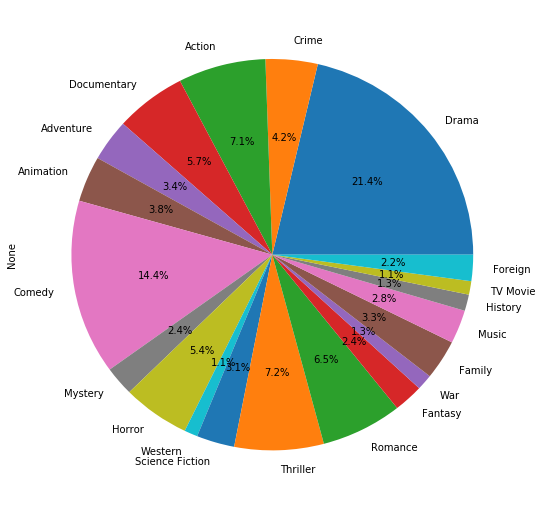

In [174]:
details[['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
         'Comedy', 'Mystery', 'Horror', 'Western', 'Science Fiction', 'Thriller', 'Romance', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum().plot(kind = 'pie', figsize = (9,9), y = 'Movies', autopct='%1.1f%%')


In [20]:
#x = details[(details.Year >= 1950)&(details.Year <= 1959)]

In [21]:
#x.groupby(['Year'])[['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
 #        'Comedy', 'Mystery', 'Horror', 'Western', 'Thriller', 'Romance', 
  #       'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
   #     ]].sum().plot(kind = 'barh', figsize = (9,18))

In [22]:
#details = pd.DataFrame(np.random.random((19,19)), columns=['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
 #        'Comedy', 'Mystery', 'Horror', 'Western', 'Thriller', 'Romance', 
  #       'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'])
 
 #Default heatmap: just a visualization of this square matrix
#p1 = sns.heatmap(details)


In [23]:
sum_genre = details.groupby(['Year'])[['Crime', 'Adventure', 'Animation', 
         'Mystery', 'Western', 'Science Fiction', 'Fantasy', 'War', 'Family', 
         'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum()
sum_genre.head()

,Crime,Adventure,Animation,Mystery,Western,Science Fiction,Fantasy,War,Family,Music,History,TV Movie,Foreign
Year,,,,,,,,,,,,,
1874,0,0,0,0,0,0,0,0,0,0,0,0,0
1878,0,0,0,0,0,0,0,0,0,0,0,0,0
1883,0,0,0,0,0,0,0,0,0,0,0,0,0
1884,0,0,0,0,0,0,0,0,0,0,0,0,0
1887,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
x = sum_genre[(sum_genre.index >= 1990)&(sum_genre.index <= 2016)]
x.head()

,Crime,Adventure,Animation,Mystery,Western,Science Fiction,Fantasy,War,Family,Music,History,TV Movie,Foreign
Year,,,,,,,,,,,,,
1990,100,68,55,36,6,76,48,17,39,43,15,30,34
1991,71,64,69,33,7,81,60,13,54,41,20,24,34
1992,90,64,72,39,4,53,52,11,63,54,20,34,33
1993,97,75,56,43,11,73,58,23,70,46,24,43,39
1994,82,90,79,47,16,85,62,13,93,38,22,39,44


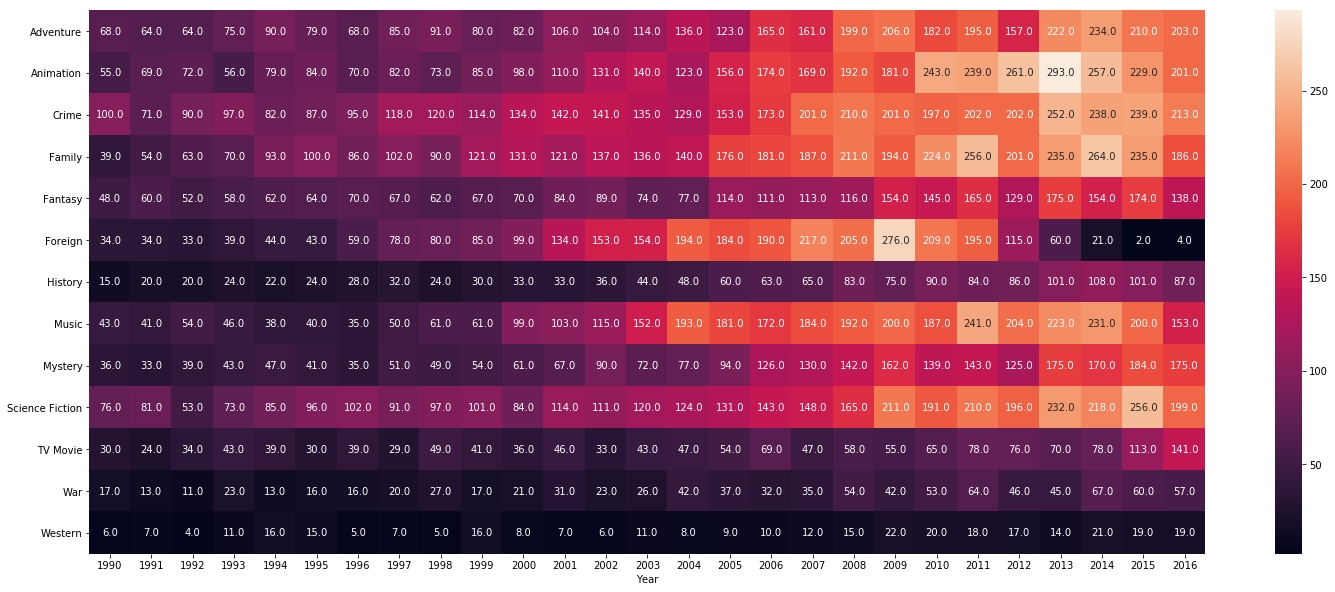

In [155]:
plt.figure(figsize = (25,10))
df = x.pivot_table(index = 'Year')
t = df.transpose()
sns.heatmap(t, annot=True, fmt=".1f")


In [26]:
big_genre = details.groupby(['Year'])[['Action', 'Comedy', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller'
        ]].sum()

In [27]:
a = big_genre[(big_genre.index >= 1990)&(big_genre.index <= 2016)]
a.head()

,Action,Comedy,Documentary,Drama,Horror,Romance,Thriller
Year,,,,,,,
1990,199,238,46,336,140,88,135
1991,163,264,66,357,95,106,134
1992,178,272,75,368,77,111,150
1993,199,275,69,438,84,127,165
1994,205,285,71,409,67,130,161


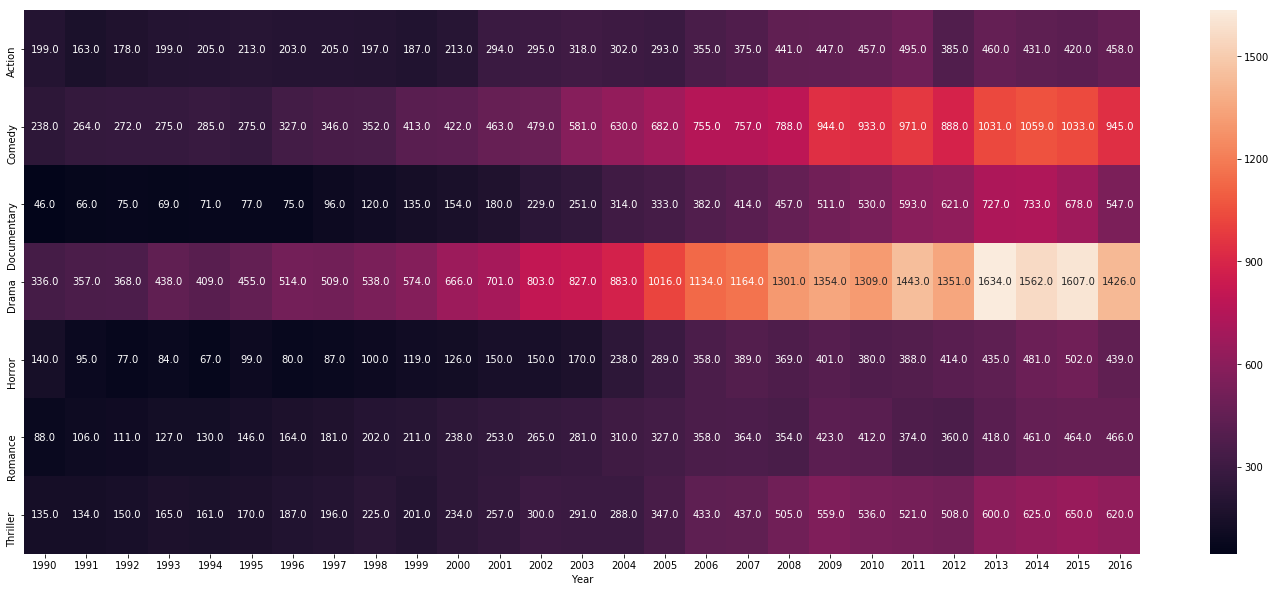

In [156]:
plt.figure(figsize = (25,10))
df = a.pivot_table(index = 'Year')
b = df.transpose()
sns.heatmap(b, annot=True, fmt=".1f")


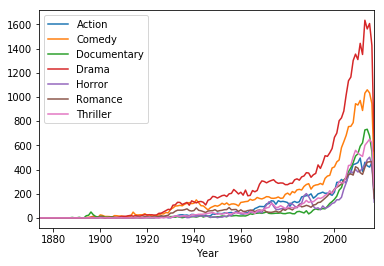

In [29]:
big_genre.plot()

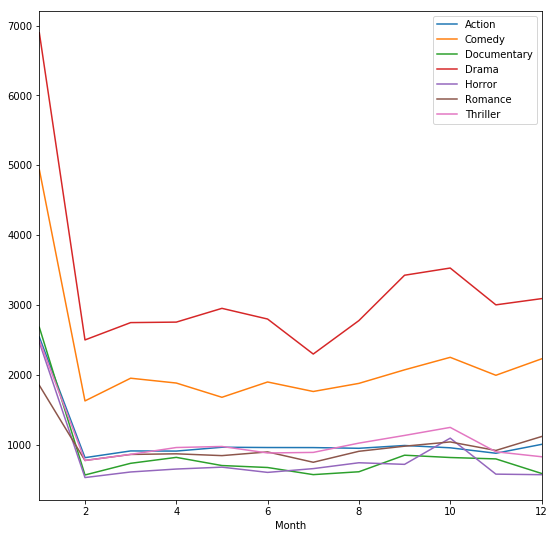

In [30]:
details.groupby(['Month'])['Action', 'Comedy', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller'].sum().plot(figsize = (9,9))

In [31]:
details.head()

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
0,2,Drama|Crime,0.823904,1988-10-21,69.0,Ariel,7.1,40,1,1,...,0,0,0,0,0,0,0,0,1988,10
1,3,Drama|Comedy,0.47445,1986-10-16,76.0,Shadows in Paradise,7.0,32,1,0,...,0,0,0,0,0,0,0,0,1986,10
2,5,Crime|Comedy,1.698,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.32287,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1


In [32]:
z = details[(details.Year >= 2010)&(details.Year <= 2016)]
z.head()

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
151,189,Crime|Thriller,6.610553,2014-08-20,102.0,Sin City: A Dame to Kill For,6.3,1197,0,1,...,0,0,0,0,0,0,0,0,2014,8
1169,1771,Action|Adventure|Science Fiction,5.214703,2011-07-22,124.0,Captain America: The First Avenger,6.6,6580,0,0,...,0,0,0,0,0,0,0,0,2011,7
1243,1865,Adventure|Action|Fantasy,10.653516,2011-05-14,136.0,Pirates of the Caribbean: On Stranger Tides,6.4,4551,0,0,...,0,1,0,0,0,0,0,0,2011,5
1300,1930,Action|Adventure|Fantasy,7.745183,2012-06-27,136.0,The Amazing Spider-Man,6.4,6172,0,0,...,0,1,0,0,0,0,0,0,2012,6
1821,2732,Drama|Science Fiction|Thriller,0.007275,2010-10-27,83.0,Nemesis,2.5,1,1,0,...,0,0,0,0,0,0,0,0,2010,10


In [33]:
ratings2 = z.groupby(['Year', 'Drama'], as_index=False)['Average Rating'].aggregate(np.mean) 
ratings2.head(20) 

,Year,Drama,Average Rating
0,2010,0,5.643457
1,2010,1,5.804813
2,2011,0,5.670887
3,2011,1,5.851282
4,2012,0,5.714702
5,2012,1,5.843005
6,2013,0,5.775738
7,2013,1,6.017013
8,2014,0,5.860613
9,2014,1,6.109795


In [34]:
ratings2.groupby(['Year'])['Average Rating'].mean()

Year
2010    5.724135
2011    5.761085
2012    5.778854
2013    5.896376
2014    5.985204
2015    6.225693
2016    6.336704
Name: Average Rating, dtype: float64

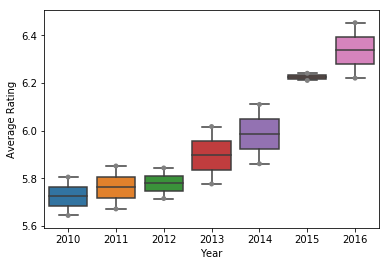

In [35]:
# Usual boxplot
ax = sns.boxplot(x= ratings2['Year'], y= ratings2['Average Rating'], data=ratings2)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x=ratings2['Year'], y= ratings2['Average Rating'], data=ratings2, color="grey")
